# Section 1: Introduction to High-Performance Computing on Multi-CPU cores

So far, we have been writing algorithms that are executed step-by-step.

Then, every line we write, the Python Interpreted converts it into Machine code and such instructions are executed by one single CPU processor.

## 1.1 What's a CPU?


Its names comes from **C**entral **P**rocessing **U**nit.

It is the responsible for executing every instruction that it is given, handling the processing of _logical_ and _mathematical_ operations.

In short, the main tasks for a CPU are:
+ Reading each instruction from memory. The CPU and RAM constantly work together. This is also called reading from memory.
+ Decoding or translating instructions in a way it can understand (Machine code).
+ Executing and carrying out the given instructions.
+ Storying the result of an execution back to memory (writing to memory).





## 1.2. The power of low-level compilers

### 1.2.1. Just-In-Time Compilation

![](imgs/slides_d2/028.PNG)

+ Just-in-time (JIT) compilation is a way of executing computer code that involves compilation during *execution of a program* rather than before execution. 

+ JIT compilation combines the speed of compiled code with the versability and flexibility of interpretation.

### 1.2.2. Numba to the rescue

#### 1.2.2.1. What's Numba?


![](imgs/slides_d2/030.PNG)

Numba is a High-Performance compiler for Python. It translates a subset of Python and NumPy functions into low-level code for speed.

Numba is best used for loops, numpy arrays operations and functions.

Some of its properties are:
1. Compile Python code into an intermediate code readable for LLVM (Low Level Virtual Machine).
2. Vectorize functions.
3. Run functions in parallel both Multi-CPU and GPU cores.
4. Easy to use thanks to decorators.

Here, we want to gain speed without having to change many lines in our programs. 

Due to Python is a high-level language, we will try to generate a low-level intermediate language through compilation 💡.

Let's see how it works.

#### 1.2.2.2. Numba's `@decorators`

Remember : Decorators allow us to modify functions and extend their use. 

We can compile our Python code by using Numba's decorators. In fact, when we call a Numba-decorated function _it is compiled to machine code "just-in-time"_ for execution.

In this way, our code can really run close to machine code speed!

#### 1.2.2.3. `nopython` mode

The Numba @jit decorator fundamentally operates in two compilation modes, nopython mode and object mode.

If we define the `@jit` decorator with the parameter `nopython=True`, the decorated function will run enterily without the involvement of the Python Interpreter.

This is the recommended and best-practice way.

(_source: [Numba](https://numba.pydata.org/)_).


##### 1.2.2.3.1. Example: Using a JIT decorator

Let's compare a compiled version of my_sum with the one that executed by the Python Interpreter.

In [ ]:
from numba import jit
import numpy as np

In [ ]:
def my_py_sum(x):
    result = 0
    for i in range(len(x)):
        result = result + x[i]
    return result

In [ ]:
@jit(nopython=True)
def my_njit_sum(x):
    result = 0
    for i in range(len(x)):
        result = result + x[i]
    return result

In [ ]:
# generating data
x = np.random.randint(10, size=100_000)

Let's compare execution times !

In [ ]:
%timeit my_py_sum(x)

100 loops, best of 5: 16.6 ms per loop


In [ ]:
%timeit my_njit_sum(x)

The slowest run took 11276.69 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 12.5 µs per loop


#### 1.2.2.4. Exercise (`nopython` mode)

1. Given two methods `py_sum(x,y)` and `np.sum(x,y)`, creates a method `numba_sum(x,y)` that computes the L1-distance of each element of two input arrays `x` and `y` with lengths $N$ (i.e., $\sum_{i=0}^{N-1} |x_i - y_i|$). 

   Be sure of _using Python's built-in functions only_ for the `numba_sum(x,y)` function. 
   
   Finally, measure their computational time for every method and compare them!

2. **(Bonus):** Run 10 repetitions of the same computation, store those computation times, and show the mean and standard deviation for `py_sum(x)`, `np.sum(x)`, and`numba_sum(x)`.


In [ ]:
import numpy as np
from numba import jit
import time

In [ ]:
# Generating 1M random numbers from (0,9).
x = np.random.randint(10, size=1_000_000) 
y = np.random.randint(10, size=1_000_000) 

In [ ]:
def py_sum(x, y):
  N = len(x)
  # creating a list of N elements
  result = 0 #[ 0 for _ in range(len(N))]
  for i in range(N):
    result = result + abs(x[i] - y[i])
  return result

In [ ]:
# add a decorator here !
def numba_sum(x, y):
  N = len(x)
  result = 0.
  for i in range(N):
    result = result + abs(x[i] - y[i])
  return result

Reminder: `time.time()` returns the current time (in seconds) of its execution!

In [ ]:
from time import time

In [ ]:
exec_time_python = time()
py_sum(x,y)
exec_time_python = time() - exec_time_python

In [ ]:
exec_time_numpy = time()
# write a numpy function here !
exec_time_numpy = time() - exec_time_numpy

In [ ]:
exec_time_numba = time()
# execute your compiled numba function here!
exec_time_numba = time() - exec_time_numba

In [ ]:
# print every execution time here

Any conclusion?

#### 1.2.2.4. Solution

In [ ]:
# your solution here

#### 1.2.2.5. [DELETE] Solution

In [ ]:
import numpy as np
from numba import jit
from time import time

In [ ]:
# Generating 1M random numbers from (0,9).
x = np.random.randint(10, size=1_000_000) 
y = np.random.randint(10, size=1_000_000) 

In [ ]:
def py_sum(x, y):
    N = len(x)
    # creating a list of N elements
    result = 0 #[ 0 for _ in range(len(N))]
    for i in range(N):
        result = result + abs(x[i] - y[i])
    return result

In [ ]:
@jit(nopython = True)
def numba_sum(x, y):
    N = len(x)
    result = 0.
    for i in range(N):
        result = result + abs(x[i] - y[i])
    return result

In [ ]:
py_sum(x, y)

3301174

In [ ]:
exec_time_python = time()
py_sum(x,y)
exec_time_python = time() - exec_time_python

In [ ]:
exec_time_numpy = time()
np.sum(np.abs(x-y))
exec_time_numpy = time() - exec_time_numpy

In [ ]:
exec_time_numba = time()
numba_sum(x,y)
exec_time_numba = time() - exec_time_numba

In [ ]:
print("Python built-in sum:", exec_time_python)
print("Numpy sum          :", exec_time_numpy )
print("Numba compiled sum :", exec_time_numba )

Python built-in sum: 0.435711145401001
Numpy sum          : 0.008499622344970703
Numba compiled sum : 0.11591291427612305


Conclusions?

**Solution Exercise #2**

In [ ]:
from time import time

times_numpy_sum  = np.zeros(shape=10)
times_python_sum = np.zeros(shape=10)
times_njit_sum   = np.zeros(shape=10)

for it in range(10):
    # python func.
    t = time()
    my_sum(x)
    t = time() - t
    times_python_sum[it] = t 

    # njit func.
    t = time()
    my_sum_njit(x)
    t = time() - t
    times_njit_sum[it] = t 

    # numpy func.
    t = time()
    np.sum(x)
    t = time() - t
    times_numpy_sum[it] = t 


In [ ]:
times_python_sum, times_njit_sum, times_numpy_sum

(array([0.294348  , 0.28803158, 0.29592371, 0.28964925, 0.29641986,
        0.29230523, 0.31979561, 0.5130136 , 0.29662228, 0.29207444]),
 array([0.00105548, 0.00105405, 0.00105095, 0.00105071, 0.00133204,
        0.00105929, 0.00122118, 0.00103569, 0.00104952, 0.00105119]),
 array([0.00078368, 0.00070119, 0.00065613, 0.0007031 , 0.0010004 ,
        0.00068808, 0.00089598, 0.00065494, 0.00080657, 0.00067949]))

In [ ]:
speedup_python = (times_python_sum/times_njit_sum)
speedup_numpy = (times_numpy_sum/times_njit_sum)

mean_py = np.mean(speedup_python)
std_py  = np.std(speedup_python)
mean_np = np.mean(speedup_numpy)
std_np  = np.std(speedup_numpy)

print("SU(py, njit) mean=%.3f\tstd=%.3f" % (mean_py, std_py)
print("SU(np, njit) mean=%.3f\tstd=%.3f" % (mean_np, std_np)

SU(python, njit) mean=292.555	std=69.656
SU(numpy, njit)  mean=0.688	std=0.052


We already improved **a lot** the computation time of our function!.

As you saw, you only need to add a _decorator_ to improve the performance and by compiling Python instructions!


---

## 1.3. Computational strategies

### 1.3.1. Serialism, Concurrency and Parallelism

![](imgs/slides_d2/039.PNG)

*Serialism* is the traditional way of doing computing: the processor or the system will be executing just one work by time.

We can distinguish between *concurrency* and *parallelism* based on the next two definitions:

**Definition 1.** 

Concurrency is a property of a program (at design level) where two or more tasks can be in progress simultaneously.


**Definition 2.**

Parallelism is a run-time property where two or more tasks are being executed simultaneously.


Let $C$ and $P$ be concurrency and parallelism, respectively, then $P \subset C$. 

Thus, parallelism requiers concurrency, but concurrency does not require parallelism.


### 1.3.2. Types of parallelisms

**Parallel computing** is the act of solving a problem of size $n$ by dividing its domain into $k \geq 2$ (with $k \in \mathcal{N}$) parts and solving them with $p$ physical processors, simultaneously.

Let $P_{D}$ be a problem with domain $D$. If $P_{D}$ is parallelizable, then $D$ can be decomposed into $k$ sub-problems:

$D = d_1 + d_2 + ... + d_k = \sum_{i=1}^k d_i$.

#### 1.3.2.1. Definition: Data- and Task-parallel problems

$P_{D}$ is a **data-parallel problem** if $D$ is composed of data elements and solving the problem requires applying a kernel function $f()$ to the whole domain:

$f(D) = f(d_{1}) + f(d_{2}) + ... + f(d_{k}) = \sum_{i=1}^k f(d_i)$.




In contrast, $P_D$ is a **task-parallel problem** if $D$ is composed of functions and solving the problem requires applying each function to a common stream of data $S$:

$D(S) = d_1(S) + d_2(S) + ... + d_k(S) = \sum_{i=1}^k d_i(S)$.

**Example**

Let $D$ be a 1D-array with $n$ components. Then, we can define $k = \frac{n}{N}$ as the amount of chunks of data to be analyzed for each core. 

Thus, we can run in parallel an algorithm such that each core works in a partition of the original data $D = d_1 + d_2 + \dots + d_k$, with $N$ the amount of cores.


![](imgs/slides_d2/044.PNG)

#### 1.3.2.2. Which types of problems are better for multithread computing?

**Data-parallel problems are ideal candidates for the GPU or multi-core CPUs beacuse each thread executes the same instructions but on different data**. 

On the other hand, tasks-parallel problems are best suited for the CPU since they enable the execution of many tasks with adaptable memory access patterns. 

----

## 1.4. Parallel computing with Python! (ft. Numba)

In this section we will use the same python ecosystem but we will include Numba for Just-In-Time compilation plus multithreading on CPUs.

![](imgs/slides_d2/046.PNG)

### 1.4.1. The magic trick: Numba's Parallel range (`prange`)

Let's use `prange`! It's like Python's `range` function but it runs in **p**arallel 🤯.


#### 1.4.1.1. Example (`prange`)

In [ ]:
import numpy as np
from numba import jit

In [ ]:
def my_serial_count(N):
    result = 0
    for i in range(N):
        result += 1 
    return result

In [ ]:
import numpy as np
from numba import jit, prange, set_num_threads 

In [ ]:
@jit(nopython=True, parallel=True)
def my_parallel_count(N):
    result = 0
    for i in prange(N):
        result += 1 
    return result

In [ ]:
my_serial_count(N=1000)

1000

In [ ]:
my_parallel_count(N=1000)

1000

In [ ]:
%timeit my_serial_count(N=1_000_000)

10 loops, best of 5: 62.7 ms per loop


In [ ]:
%timeit my_parallel_count(N=1_000_000)

The slowest run took 448.88 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 2.7 µs per loop


#### 1.4.1.2. Exercise

Improve our function `my_serial_sum(x)` and make it run in multiple cores via `@parallel`. Measure the computation time and calculate the _speed-up_ compared with our previous version with `@njit`.

In [ ]:
import numpy as np
from numba import prange, jit

In [ ]:
# Generating 1M random numbers from (0,9).
x = np.random.randint(10, size=1_000_000) 

In [ ]:
@jit(nopython=True)
def my_serial_sum(x):
    N = len(x)
    result = 0
    for i in prange(N):
        result = result + x[i]
    return result


#### 1.4.1.3. Solution

In [ ]:
import numpy as np
from numba import prange, jit

In [ ]:
# Generating 1M random numbers from (0,9).
x = np.random.randint(10, size=1_000_000) 

In [ ]:
def my_py_sum(x):
    N = len(x)
    result = 0
    for i in prange(N):
        result = result + x[i]
    return result

In [ ]:
@jit(nopython=True)
def my_serial_sum(x):
    N = len(x)
    result = 0
    for i in prange(N):
        result = result + x[i]
    return result

In [ ]:
@jit(nopython=True, parallel=True)
def my_parallel_sum(x):
    N = len(x)
    result = 0
    for i in prange(N):
        result = result + x[i]
    return result

In [ ]:
%timeit my_serial_sum(x)

1000 loops, best of 5: 273 µs per loop


In [ ]:
%timeit my_parallel_sum(x)

The slowest run took 1152.68 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 5: 317 µs per loop


#### 1.4.1.4. Bonus exercises

Measure the computation time of each version (i.e., pure Python, NumPy, `nopython` compiled, and `parallel`) for 10 repetitions.

Print the mean and standard deviation of the speed-up for each case.

In [ ]:
from time import time

times_numpy_sum  = np.zeros(shape=10)
times_python_sum = np.zeros(shape=10)
times_njit_sum   = np.zeros(shape=10)
times_parallel_sum = np.zeros(shape=10)

for it in range(10):
    # python func.
    t = time()
    my_py_sum(x)
    t = time() - t
    times_python_sum[it] = t 

    # numpy func.
    t = time()
    np.sum(x)
    t = time() - t
    times_numpy_sum[it] = t 

    # njit func.
    t = time()
    my_serial_sum(x)
    t = time() - t
    times_njit_sum[it] = t

    # nopython=True, parallel=True
    t = time()
    my_parallel_sum(x)
    t = time() - t
    times_parallel_sum[it] = t

In [ ]:
speedup_python = (times_python_sum/times_parallel_sum)
speedup_numpy = (times_numpy_sum/times_parallel_sum)
speedup_njit = (times_njit_sum/times_parallel_sum)

mean_py = np.mean(speedup_python)
std_py  = np.std(speedup_python)
mean_np = np.mean(speedup_numpy)
std_np  = np.std(speedup_numpy)
mean_njit = np.mean(speedup_njit)
std_njit  = np.std(speedup_njit)

print("SU(py, p)   mean=%.3f\tstd=%.3f" % (mean_py, std_py))
print("SU(np, p)   mean=%.3f\tstd=%.3f" % (mean_np, std_np))
print("SU(njit, p) mean=%.3f\tstd=%.3f" % (mean_njit, std_njit))

SU(py, p)   mean=230.761	std=44.310
SU(np, p)   mean=1.631	std=0.369
SU(njit, p) mean=1.071	std=0.134


----

## 1.5. Practical Session (HPC): Measuring Speed-up with Numba on  Multi-CPU cores. 

### 1.5.1. Exercises

1. Create two vectors `x` and `y` that contain $N$ random values between 0 and 1.

In [ ]:
import numpy as np

In [ ]:
# your code here :) 
# Hint: Usec an np.random.randint()

2. Compute the distance $d$ between the two vectors $x$ and $y$ with length $N$ such that $d(x,y) = \sqrt{(x_1 - y_1)^2+(x_2 - y_2)^2+ \dots + (x_N - y_N)^2}$.

Use pure python for this (e.g., `import math` for square root computation). 

In [ ]:
# your code here

3. Make a copy of such function and make it `@jit(nopython=True)` and parallel via `@jit(nopython=True, parallel=True)`.

In [ ]:
from numba import jit, prange

In [ ]:
# your code here

4. Execute these three functions and save their execution times across 10 repetitions. 

   Compute the speed-ups as follows:
   + Python method vs Parallel:  $speedup_{(py, parallel)} = \bar{t}_{py} / \bar{t}_{p}$.
   + Compiled method vs Parallel:  $speedup_{(njit, parallel)} = \bar{t}_{njit} / \bar{t}_{p}$.

  Note: $\bar{t}_{i,j}$ is the average execution time between methods $i$ and $j$.

  Print both speed-ups (mean and std).


In [ ]:
from time import time

In [ ]:
# your code here


5. Repeat this same procedure but change the length of the vectors $N$ (e.g., `l_N = [10, 100, 1000, 10000, 100000, 1000000]`). As a recommendation, you can store the computational times into a matrix of `n_rep` columns and `l_N` rows.

In [ ]:
l_N = [10, 100, 1000, 10000, 100000, 1000000]

In [ ]:
# your code here

6. Make a plot that shows how the speed-up changes when the size of the problem increases (i.e., $N$). Do this for $Speedup_{py,p}$ and $Speedup_{njit,p}$, *separately*. 

   Use `plt.errorbar(l_N, mean_speedup, std_speedup)` to show your results. For more information about errorbar, check [this](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html).


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# your code here

7. Finally, plot both speed-up. To see the differences, add `plt.loglog()` and `
plt.axhline(1, color='k', alpha=0.3, ls='--')` at the end of each cell. Your plots will change both x- and y-axis to log-scale. What can we conclude from these results?

In [ ]:
# your code here
plt.loglog()
plt.axhline(1, color='k', alpha=0.3, ls='--')

### 1.5.2. Solutions

### 1.5.2. [DELETE] Solutions

1. Create two vectors `x` and `y` that contain $N$ random values between 0 and 1.

In [ ]:
import numpy as np

In [ ]:
N = 1_000_000
x = np.random.randint(1000, size=N)/1000.
y = np.random.randint(1000, size=N)/1000.

2. Compute the euclidean distance between the two vectors: $d(a,b) = \sqrt{(x_1 - y_1)^2+(x_2 - y_2)^2+ \dots + (x_N - y_N)^2}$.

Use pure python for this (e.g., `import math` for square root computation). 

In [ ]:
def py_euclidean_distance(x,y):
    distance = 0.
    for i in range(len(x)):
        distance = distance + (x[i]-y[i])**2
    return distance 

3. Make a copy of such function and make it `jit(nopython=True)` and parallel via `@jit(nopython=True, parallel=True)`.

In [ ]:
from numba import jit, prange

In [ ]:
@jit(nopython=True)
def njit_euclidean_distance(x,y):
    distance = 0.
    for i in range(len(x)):
        distance = distance + (x[i]-y[i])**2
    return distance 

@jit(nopython=True, parallel=True)
def parallel_euclidean_distance(x,y):
    distance = 0.
    for i in prange(len(x)):
        distance = distance + (x[i]-y[i])**2
    return distance 

In [ ]:
import matplotlib.pyplot as plt

4. Execute all these functions and saves their execution times for 10 repetitions. 

   Compute the speed-ups as follows:
   + Python method vs Parallel:  $speed-up_{py, p} = \bar{time}_{py} / \bar{time}_{p}$.
   + Compiled method vs Parallel:  $speed-up_{njit, p} = \bar{time}_{njit} / \bar{time}_{p}$.

  Note: $\bar{time}_{i,j}$ is the average execution time between methods $i$ and $j$.

  Print both speed-ups (mean and std).


In [ ]:
from time import time
exec_times = np.zeros(shape=(3, 10))

In [ ]:
my_methods = [
    py_euclidean_distance, njit_euclidean_distance, parallel_euclidean_distance
]

In [ ]:
for i in range(len(my_methods)):
    f = my_methods[i]
    for j in range(10):
        t = time()
        f(x,y)
        t = time()-t
        exec_times[i,j] = t

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [ ]:
exec_times

array([[0.64537978, 0.63093066, 0.79584622, 0.80611014, 0.76738954,
        0.6186738 , 0.6139524 , 0.598382  , 0.61105275, 0.63395953],
       [0.11797428, 0.00234175, 0.0022707 , 0.00217056, 0.00214028,
        0.00212193, 0.00211096, 0.00215507, 0.00222754, 0.00212765],
       [0.53871512, 0.00181937, 0.00161648, 0.0013535 , 0.00119114,
        0.00110722, 0.00104785, 0.00099158, 0.00096893, 0.00097132]])

In [ ]:
speedup_py = exec_times[0]/exec_times[-1]
speedup_njit = exec_times[1]/exec_times[-1]
print("Speed-up(pu, p) =", speedup_py)
print("Speed-up(njit, p) =", speedup_py)

Speed-up(pu, p) = [  1.19799826 346.78482506 492.33348083 595.57354236 644.24839872
 558.76528854 585.91649602 603.46140899 630.6449311  652.68016691]
Speed-up(njit, p) = [  1.19799826 346.78482506 492.33348083 595.57354236 644.24839872
 558.76528854 585.91649602 603.46140899 630.6449311  652.68016691]


In [ ]:
mean_speedup_py = np.mean(speedup_py)
std_speedup_py = np.std(speedup_py)
mean_speedup_njit = np.mean(speedup_njit)
std_speedup_njit = np.std(speedup_njit)

In [ ]:
print("Speed-up(pu, p)   = mean:%.2f\tstd:%.2f" % (mean_speedup_py, std_speedup_py))
print("Speed-up(njit, p) = mean:%.2f\tstd:%.2f" % (mean_speedup_njit, std_speedup_njit))

Speed-up(pu, p)   = mean:511.16	std:190.51
Speed-up(njit, p) = mean:1.69	std:0.59



5. Repeat this same procedure but change the length of the vectors $N$ (e.g., `l_N = [10, 100, 1000, 10000, 100000, 1000000]`). As a recommendation, you can store the computational times into a matrix of `n_rep` columns and `l_N` rows.

In [ ]:
l_N = [10, 100, 1000, 10000, 100000, 1000000]

In [ ]:
exec_times_N = np.zeros(shape=(3,10,len(l_N)))
for i_N in range(len(l_N)):
    # generating arrays
    N = l_N[i_N]
    x = np.random.randint(1000, size=N)/1000.
    y = np.random.randint(1000, size=N)/1000.

    for i in range(len(my_methods)):
        f = my_methods[i]
        for j in range(10):
            t = time()
            f(x,y)
            t = time()-t
            exec_times_N[i,j,i_N] = t

In [ ]:
exec_times_N.shape

(3, 10, 6)

In [ ]:
py_speed_up = exec_times_N[0,:,:] / exec_times_N[1,:,:]
py_speed_up.shape, np.mean(py_speed_up, axis=0).shape

((10, 6), (6,))

In [ ]:
py_speed_up = exec_times_N[0,:,:] / exec_times_N[2,:,:]
py_mean_su = np.mean(py_speed_up, axis=0)
py_std_su = np.std(py_speed_up, axis=0)

njit_speed_up = exec_times_N[1,:,:] / exec_times_N[2,:,:]
njit_mean_su = np.mean(njit_speed_up, axis=0)
njit_std_su = np.std(njit_speed_up, axis=0)

In [ ]:
exec_times_N[2,:,:]

array([[8.36849213e-05, 1.93119049e-05, 7.67230988e-03, 1.13010406e-04,
        2.19345093e-03, 1.81078911e-03],
       [4.29153442e-06, 3.57627869e-06, 2.16960907e-05, 1.43051147e-05,
        9.34600830e-05, 1.02758408e-03],
       [3.09944153e-06, 3.33786011e-06, 4.29153442e-06, 1.19209290e-05,
        8.58306885e-05, 1.00708008e-03],
       [3.09944153e-06, 3.09944153e-06, 3.81469727e-06, 1.19209290e-05,
        8.17775726e-05, 9.85860825e-04],
       [2.86102295e-06, 3.33786011e-06, 4.05311584e-06, 1.19209290e-05,
        9.01222229e-05, 9.52959061e-04],
       [3.09944153e-06, 3.09944153e-06, 4.05311584e-06, 1.16825104e-05,
        8.05854797e-05, 9.41276550e-04],
       [3.09944153e-06, 3.33786011e-06, 3.81469727e-06, 1.21593475e-05,
        8.10623169e-05, 8.91923904e-04],
       [3.33786011e-06, 3.33786011e-06, 4.05311584e-06, 1.16825104e-05,
        8.10623169e-05, 8.94069672e-04],
       [3.09944153e-06, 3.09944153e-06, 4.05311584e-06, 1.19209290e-05,
        8.32080841e-05, 

6. Make a plot that shows how the speed-up changes when the size of the problem increases (i.e., $N$). Do this for $Speedup_{py,p}$ and $Speedup_{njit,p}$, *separately*. 

   Use `plt.errorbar(l_N, mean_speedup, std_speedup)` to show your results. For more information about errorbar, check [this](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html).


Text(0.5, 0, 'N (problem size)')

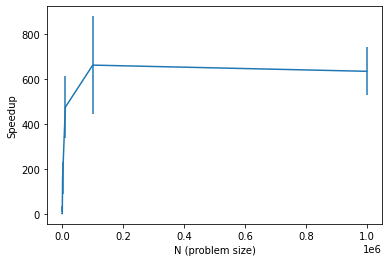

In [ ]:
f, ax = plt.subplots(figsize=(6,4))
ax.errorbar(l_N, py_mean_su, py_std_su, label='py') 
ax.set_ylabel("Speedup")
ax.set_xlabel("N (problem size)")

Text(0.5, 0, 'N (problem size)')

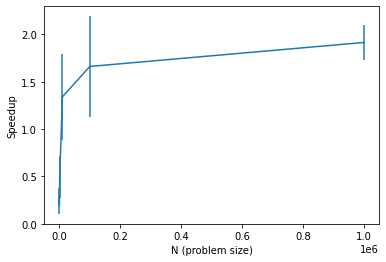

In [ ]:
f, ax = plt.subplots(figsize=(6,4))
ax.errorbar(l_N, njit_mean_su, njit_std_su, label='py') 
ax.set_ylabel("Speedup")
ax.set_xlabel("N (problem size)")

7. Finally, plot both speed-up. To see the differences, add `plt.loglog()` and `
plt.axhline(1, color='k', alpha=0.3, ls='--')` at the end of each cell. Your plots will change both x- and y-axis to log-scale. What can we conclude from these results?

Text(0.5, 0, 'N [LOG]')

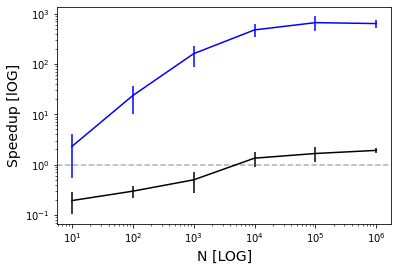

In [ ]:
f, ax = plt.subplots(figsize=(6,4))
ax.errorbar(l_N, py_mean_su, py_std_su, color='blue') 
ax.errorbar(l_N, njit_mean_su, njit_std_su, color='k') 
plt.loglog()
plt.axhline(1, color='k', alpha=0.3, ls='--')
ax.set_ylabel("Speedup [lOG]", fontsize=14)
ax.set_xlabel("N [LOG]", fontsize=14)

---

# Section 2: Introduction to High-Performance Computing on GPU

## 2.1. What's a GPU?


![](imgs/slides_d2/065.PNG)



+ It comes from **G**raphics **P**rocessing **U**nit.
+ Specialized processor dedicated to graphics processing tasks.

## 2.2. Differences between CPU and GPU

**CPU:** 
+ Multiple cores.
+ Complex control logic.
+ Optimized for serial operations.

**GPU:** 
+ Many parallel executing units (ALUs).
+ Best known use case: Graphics.

## 2.3 Compute Unified Device Architecture (CUDA)

### 2.3.1. What's CUDA?



![](imgs/slides_d2/070.PNG)

+ Cuda is a software layer that gives direct access to the GPU’s virtual instruction set and parallel computational elements to execute functions, called *kernels*.
+ CUDA is indicated as a General-Purpose computing on GPUs (GPGPU).
+ GPUs traditionally handle computations for computer graphics.

### 2.3.2. CUDA's Program Flow

![](imgs/slides_d2/071.PNG)

1. Load data on Host.
2. Allocate device memory.
3. Copy data from Host to Device.
4. Execute divece *kernels* to process data.
5. Copy results from Device to Host memory.

## 2.4. Parallel GPU computing with Python

### 2.4.1. Universal functions (`ufunc`)

A universal function is a function that operates on `ndarrays` in an element-by-element fashion, supporting array broadcasting, type casting, and several other standard features. 

A `ufunc` is a "vectorized" wrapper for a function that takes a fixed number of specific inputs and produces a fixed number of specific outputs. 

(_Source: [Numpy Documentation](https://numpy.org/doc/stable/reference/ufuncs.html)_).

#### 2.4.1.1. Example: My first vectorized function

In [ ]:
from numba import vectorize 
import math

In [ ]:
# generating data
num_points = int(1e6) # 1 million of points

In [ ]:
@vectorize
def cpu_sqrt(x):
    return math.sqrt(x)

In [ ]:
@vectorize(['float32(float32)'], target='cuda')
def gpu_sqrt(x):
    return math.sqrt(x)

#### 2.4.1.2. Allowing multiple signatures in vectorized functions

Numba's vectorized functions can allow more than one data type as input. In that case, we will need to add another signature as the input parameter of the vectorize decorator.

For example:

In [ ]:
@vectorize(['int32(int32, int32)', 'float64(float64, float64)'])
def my_ufunc(x, y):
    return x+y+math.sqrt(x*math.cos(y))

In [ ]:
@vectorize(['int32(int32, int32)', 'float64(float64, float64)'])
def my_ufunc(x, y):
    return np.abs(x-y)

In [ ]:
a = np.arange(1.0, 10.0, dtype='f8')
b = np.arange(1.1, 10.1, dtype='f8')
print(my_ufunc(a, b))

[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]


In [ ]:
a = np.arange(1, 10, dtype='i4')
b = np.arange(2, 11, dtype='i4')
print(my_ufunc(a, b))

[1 1 1 1 1 1 1 1 1]


#### 2.4.1.2. Exercise

Create two vectorized functions: `my_cpu_ufunc` and `my_gpu_func`. Both receive two arrays `x` and `y` as input parameters.

Make `my_cpu_ufunc` and `my_gpu_ufunc` running in CPU and GPU, respectively.

#### 2.4.1.3. Solution

In [ ]:
from numba import vectorize 

In [ ]:
# generating data
a = np.arange(1.0, 10.0)
b = np.ones(shape=a.shape[0])

In [ ]:
# add the decorartor here!
def my_cpu_ufunc(x, y):
    return abs(x-y)

In [ ]:
# add the decorartor here!
def my_gpu_ufunc(x, y):
    return abs(x-y)

Try them!

In [ ]:
%time my_cpu_ufunc(a, b)

CPU times: user 25 µs, sys: 4 µs, total: 29 µs
Wall time: 33.4 µs


array([0., 1., 2., 3., 4., 5., 6., 7., 8.])

In [ ]:
%time my_gpu_ufunc(a, b)

CPU times: user 4.34 ms, sys: 33 µs, total: 4.37 ms
Wall time: 4.51 ms


array([0., 1., 2., 3., 4., 5., 6., 7., 8.])

How was the performance of CPU vs GPU vectorization?

#### 2.4.1.3 Solution (Solved)

In [ ]:
import numpy as np

In [ ]:
from numba import vectorize 
import math

In [ ]:
@vectorize(['float64(float64, float64)'], target='cpu')
def my_cpu_ufunc(x, y):
    return abs(x-y)

In [ ]:
@vectorize(['float64(float64, float64)'], target='cuda')
def my_gpu_ufunc(x, y):
    return abs(x-y)

In [ ]:
a = np.arange(1.0, 10.0)
b = np.ones(shape=a.shape[0])

In [ ]:
# Calls compiled version of my_ufunc for each element of a and b
print(my_cpu_ufunc(a, b))

[0. 1. 2. 3. 4. 5. 6. 7. 8.]


In [ ]:
# Calls compiled version of my_ufunc for each element of a and b
print(my_gpu_ufunc(a, b))

[0. 1. 2. 3. 4. 5. 6. 7. 8.]


----

## 2.4.2.  GPU's Device functions

### 2.4.2.1. Introduction

Remember the CUDA program flow? We can have control of the data transfering of our data from/to GPU with GPU's device functions. 

![](imgs/slides_d2/071.PNG)

These functions are compiled functoins executed on GPU.

### 2.4.2.2. Example

In [ ]:
from numba import vectorize
import numpy as np

In [ ]:
@vectorize(['int16(int16, int16)'], target='cuda')
def a_device_function(x, y):
    return x + y

In [ ]:
n = 10_000
x = np.ones(shape=n, dtype=np.int16)
y = x*2
print(x)
print(y)

[1 1 1 ... 1 1 1]
[2 2 2 ... 2 2 2]


In [ ]:
# transfer inputs to the gpu
x_gpu = cuda.to_device(x)
y_gpu = cuda.to_device(y)

In [ ]:
# creating out array on GPU
z_gpu = cuda.device_array(shape=(n,), dtype=np.int16)

In [ ]:
a_device_function(x_gpu, y_gpu, out=z_gpu)

In [ ]:
z = z_gpu.copy_to_host()

In [ ]:
print(z)

[3 3 3 ... 3 3 3]


Pure Numpy version

In [ ]:
n = 5_000_000

# random values between 0. and 255.
greyscales = np.floor(np.random.uniform(0, 256, n).astype(np.float32))
# random weights following a Gaussian distribution
# centred on 0.5 and with width 0.1
weights = np.random.normal(.5, .1, n).astype(np.float32)

def normalize(grayscales):
    return grayscales / 255

def weigh(values, weights):
    return values * weights
        
def activate(values):
    return ( np.exp(values) - np.exp(-values) ) / \
            ( np.exp(values) + np.exp(-values) )

In [ ]:
%%timeit
normalized = normalize(greyscales)
weighted = weigh(normalized, weights)
activated = activate(weighted)

10 loops, best of 5: 52.1 ms per loop


Parallel version for the GPU

In [ ]:
@vectorize(['float32(float32)'],target='cuda')
def gpu_normalize(x):
    return x / 255

@vectorize(['float32(float32, float32)'],target='cuda')
def gpu_weigh(x, w):
    return x * w

@vectorize(['float32(float32)'],target='cuda')
def gpu_activate(x): 
    return ( math.exp(x) - math.exp(-x) ) / ( math.exp(x) + math.exp(-x) )

In [ ]:
%%timeit
normalized = gpu_normalize(greyscales)
weighted = gpu_weigh(normalized, weights)
activated = gpu_activate(weighted)

The slowest run took 13.52 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 5: 34.1 ms per loop


" That's already quite nice, we gained more than a factor of two!

But we realize that we spend time transferring data back and forth between the host and the GPU for nothing:

    transfer greyscales to the GPU
    transfer normalized to the host, and then back to the GPU, together with weights
    transfer weighted to the host, and then back to the GPU
    transfer activated to the host

Actually, we only need to:

    transfer greyscales and weights to the GPU
    retrieve activated
"

In [ ]:
from numba import cuda

In [ ]:
%%time
# create intermediate arrays on the GPU
normalized_gpu = cuda.device_array(shape=(n,), dtype=np.float32)
weighted_gpu = cuda.device_array(shape=(n,),  dtype=np.float32)

# note that output device arrays are provided as arguments 
gpu_normalize(greyscales, out=normalized_gpu)
gpu_weigh(normalized_gpu, weights, out=weighted_gpu)
activated = gpu_activate(weighted_gpu)

CPU times: user 12.9 ms, sys: 975 µs, total: 13.9 ms
Wall time: 14.2 ms


"Another important thing to know is that we can also take full control on the transfers to and from the GPU like this: "

In [ ]:
# transfer inputs to the gpu
greyscales_gpu = cuda.to_device(greyscales)
weights_gpu = cuda.to_device(weights)

# create intermediate arrays and output array on the GPU
normalized_gpu = cuda.device_array(shape=(n,), dtype=np.float32)
weighted_gpu = cuda.device_array(shape=(n,) ,  dtype=np.float32)
activated_gpu = cuda.device_array(shape=(n,), dtype=np.float32)

In [ ]:
%%timeit
gpu_normalize(greyscales_gpu, out=normalized_gpu)
gpu_weigh(normalized_gpu, weights_gpu, out=weighted_gpu)
gpu_activate(weighted_gpu, out=activated_gpu)

1000 loops, best of 5: 1.6 ms per loop


In [ ]:
activated = activated_gpu.copy_to_host()
activated

array([0.03589012, 0.39105397, 0.26380607, ..., 0.11930222, 0.10589294,
       0.41564855], dtype=float32)

---

"
Wait! We do not gain anything and the CPU version is actually faster! 

If the calculation is too simple, there is no use shipping our data to the GPU for fast parallel processing, if we are to wait so long for the data transfers to complete. In other words, most of the time is spent in the data transfers, and the GPU is basically useless.

Let's see what happens with a more involved calculation. 
"

In [ ]:
## From cartesian to polar coordinates on the GPU (Change this exercise)

points = np.random.multivariate_normal([0,0], [[1.,0.9], [0.9,1.]], 1000).astype(np.float32)
points

array([[ 0.18369633,  0.00225783],
       [ 0.05449148, -0.50737995],
       [ 0.45961592,  0.96869206],
       ...,
       [-0.22614779,  0.37502873],
       [-0.25419563, -0.9403678 ],
       [ 0.41602236,  0.24622814]], dtype=float32)

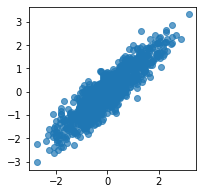

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(3,3)); plt.scatter(points[:,0], points[:,1], alpha=0.7)

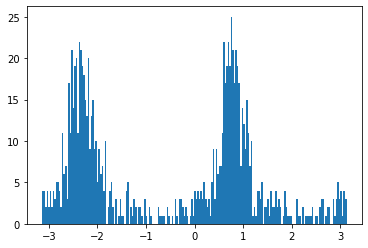

In [ ]:
theta = np.arctan2(points[:,1], points[:,0]) 
_ = plt.hist(theta, bins=200)

In [ ]:
# "Now let's try and perform the same calculation on the GPU. This time, we have two input values, and we define the function signature accordingly."

@vectorize(['float32(float32, float32)'], target='cuda')
def gpu_arctan2(y, x): 
    theta = math.atan2(y,x)
    return theta

@vectorize(['float32(float32, float32)'], target='cpu')
def cpu_arctan2(y, x): 
    theta = math.atan2(y,x)
    return theta

In [ ]:
theta = gpu_arctan2(points[:,1], points[:,0])

ValueError: ignored

In [ ]:
x = np.ascontiguousarray(points[:,0]);
y = np.ascontiguousarray(points[:,1])

In [ ]:
theta = gpu_arctan2(y, x)

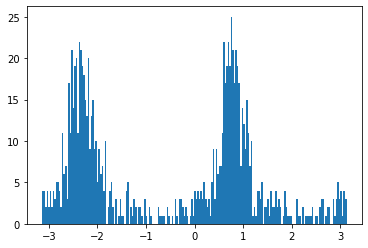

In [ ]:
_ = plt.hist(theta, bins=200)

In [ ]:
# "As a general rule, one should remember that CUDA operates on data buffers that are contiguous in memory, like a C array, or a numpy array before any slicing."

# "Now let's be a bit more ambitious, and compute theta for 10 million points:"

points = np.random.multivariate_normal([0,0], [[1.,0.9], [0.9,1.]], int(1e7)).astype(np.float32)
x = np.ascontiguousarray(points[:,0])
y = np.ascontiguousarray(points[:,1])

In [ ]:
%timeit np.arctan(y, x) # numpy

10 loops, best of 5: 156 ms per loop


In [ ]:
%timeit cpu_arctan2(y, x) # compiled for the CPU 

1 loop, best of 5: 261 ms per loop


In [ ]:
%timeit gpu_arctan2(y, x) # compiled for the GPU 

10 loops, best of 5: 30.6 ms per loop


In [ ]:
%timeit [math.atan2(point[1], point[0]) for point in points]

1 loop, best of 5: 5.62 s per loop


# Section 3: Graph analysis

**Context**

Historically first and conceptually simplest is degree centrality, which is defined as the number of links incident upon a node (i.e., the number of ties that a node has). The degree can be interpreted in terms of the immediate risk of a node for catching whatever is flowing through the network (such as a virus, or some information). In the case of a directed network (where ties have direction), we usually define two separate measures of degree centrality, namely indegree and outdegree. Accordingly, indegree is a count of the number of ties directed to the node and outdegree is the number of ties that the node directs to others. When ties are associated to some positive aspects such as friendship or collaboration, indegree is often interpreted as a form of popularity, and outdegree as gregariousness.

The degree centrality of a vertex $v$ , for a given graph $G := ( V , E )$ with $| V |$ vertices and $| E |$ edges, is defined as:

$DegreeCentrality(v) = deg(v)$.

Source: [Wikipedia](https://en.wikipedia.org/wiki/Centrality).

In [ ]:
import numpy as np
from numba import prange, jit

In [ ]:
adj = np.array([
  [0, 1, 0, 1, 1],
  [1, 0, 0, 1, 0],
  [0, 0, 0, 0, 1],
  [1, 1, 0, 0, 1],
  [1, 0, 1, 1, 0],
])

In [ ]:
np.sum(adj, axis=0)

array([3, 2, 1, 3, 3])

In [ ]:
%timeit np.sum(adj, axis=0)

The slowest run took 13.58 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 3.71 µs per loop


In [ ]:
@jit(nopython=True, parallel=True)
def node_degrees(A):
    B = np.zeros(shape=A.shape[0])
    for i in prange(A.shape[0]):
        B[i] += np.sum(A[i,:])
    return B


In [ ]:
%timeit node_degrees(adj)

The slowest run took 207215.06 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 5: 2.84 µs per loop


-----

# Section 3: A hidden layer implementation for image processing

## 3.1. Introduction

![](https://miro.medium.com/max/1400/1*7aroEBBT6eKjARQEdY5dlQ.png)

(_Image from [TowardDataScience.com](https://towardsdatascience.com/how-to-build-neural-network-from-scratch-d202b13d52c1)_).

Imagine you want to train a neural network for image processing.

A hidden layer in the network might have to do the following:

+ Normalize greyscale values in the image (**input**)
+ Weight them (`w`)
+ Apply an activation function $f$.


You can send an array `x` to GPU by running:

```python
x_gpu = cuda.to_device(x)
```

In case you need to store intermediate results in intermediate arrays, you can create them as follows:

```python
intermediate_gpu = cuda.device_array(shape=(n,), dtype=np.float32)
```

As you saw, you will have to specify (1) the array size and (2) the data type. In this case, this _"CUDA-array"_ has size `n` and its type is `float32`.

You can check more data types [here](https://numpy.org/doc/stable/user/basics.types.html).

The input vector $x$ represent a greyscale image. It contains values from 0 to 255. 

Thus, this problem can be solved in three steps:

1. Normalizing gray scale vectors: $\hat{x} = x / 255$ (normilazing grayscale vectors)

2. Applying weights: $\hat{w} = \hat{x} \cdot {w}$

3. Computing an activation function $f(\hat{w})$ such that: $f(\hat{w}) = \frac{e^\hat{w} - e^\hat{w}}{e^\hat{w} + e^\hat{w}}$

First, we need to create the grayscale vectors ($x$):

Next, we will start the weights ($w$)of our network randomly, following a Gaussian distribution with $\mu = 0.5$, and $\sigma = 0.1$. Thus, such distribution is centred on 0.5 and with witdh 0.1.

Both $x$ and $w$ with be defined as `np.float32`.

The implementation with pure NumPy is:

In [ ]:
n = 1000000

# random values between 0. and 255.
x = np.floor(np.random.uniform(0, 256, n).astype(np.float32))
# random weights following a Gaussian distribution
# centred on 0.5 and with width 0.1
w = np.random.normal(.5, .1, n).astype(np.float32)

And the proper computation of our activation function $f(\hat{w})$ will be:

In [ ]:
def normalize(grayscales):
    return grayscales / 255

def weigh(values, weights):
    return values * weights
        
def activate(values):
    return ( np.exp(values) - np.exp(-values) ) / \
            ( np.exp(values) + np.exp(-values) )



In [ ]:
%%timeit
normalized = normalize(x)
weighted = weigh(normalized, w)
activated = activate(weighted)

## 3.2. The Final Task


## 3.2.1. Solution

For this, we will need to import `cuda` from `numba`.

In [ ]:
from numba import cuda, vectorize

Then, we can generate some data for `greyscales` and start our network with random `weights`:

In [ ]:
n = 1000000

# random values between 0. and 255.
x = np.floor(np.random.uniform(0, 256, n).astype(np.float32))

# random weights following a Gaussian distribution
# centred on 0.5 and with width 0.2
w = np.random.normal(.5, .2, n).astype(np.float32)

In [ ]:
# Hint: Transfer inputs to the GPU (i.e., x_gpu and w_gpu)


In [ ]:
# Add a decorator to run it on GPU!
def gpu_normalize(x):
    return x / 255

# Add a decorator to run it on GPU!
def gpu_weigh(x, w):
    return x * w

# Add a decorator to run it on GPU!
def gpu_activate(x): 
    return ( math.exp(x) - math.exp(-x) ) / ( math.exp(x) + math.exp(-x) )

Let's control the transfers to and from the GPU!

In [ ]:
# create intermediate arrays and output array on the GPU ('device array')
# 1) normalized_gpu (shape=n, dtype=np.float32)
# 2) weighted_gpu (shape=n, dtype=np.float32)
# 3) activated_gpu (shape=n, dtype=np.float32)

Do the computation:

In [ ]:
%%timeit
gpu_normalize(x_gpu, out=normalized_gpu)
gpu_weigh(normalized_gpu, w_gpu, out=weighted_gpu)
gpu_activate(weighted_gpu, out=activated_gpu)

Finally, we retrieve the results:

In [ ]:
activated = activated_gpu.copy_to_host()

In [ ]:
print(activated)

---

## 3.2.1. [DELETE] Solution

For this, we will need to import `cuda` from `numba`.

In [ ]:
from numba import cuda, vectorize
import numpy as np
import math

Then, we can generate some data for `greyscales` and start our network with random `weights`:

In [ ]:
n = 1000000

# random values between 0. and 255.
x = np.floor(np.random.uniform(0, 256, n).astype(np.float32))

# random weights following a Gaussian distribution
# centred on 0.5 and with width 0.2
w = np.random.normal(.5, .2, n).astype(np.float32)

In [ ]:
# Hint: Transfer inputs to the GPU (i.e., greyscales_gpu and weights_gpu)
# transfer inputs to the gpu
x_gpu = cuda.to_device(x)
w_gpu = cuda.to_device(w)


In [ ]:
normalized_gpu = cuda.device_array(shape=(n,), dtype=np.float32)
weighted_gpu = cuda.device_array(shape=(n,), dtype=np.float32)
activated_gpu = cuda.device_array(shape=(n,), dtype=np.float32)

In [ ]:
@vectorize(['float32(float32)'],target='cuda')
def gpu_normalize(x):
    return x / 255

@vectorize(['float32(float32, float32)'],target='cuda')
def gpu_weigh(x, w):
    return x * w

@vectorize(['float32(float32)'],target='cuda')
def gpu_activate(x): 
    return ( math.exp(x) - math.exp(-x) ) / ( math.exp(x) + math.exp(-x) )

In [ ]:
%%timeit
gpu_normalize(x_gpu, out=normalized_gpu)
gpu_weigh(normalized_gpu, w_gpu, out=weighted_gpu)
gpu_activate(weighted_gpu, out=activated_gpu)

The slowest run took 433.18 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 5: 1.44 ms per loop


Finally, we retrieve the results:

In [ ]:
activated = activated_gpu.copy_to_host()

In [ ]:
print(activated)

[0.43143082 0.439002   0.03473125 ... 0.10591199 0.01777428 0.5020245 ]


### 3.2.1. Part 1. Using the GPU decorator.


Implement a pararllel version of this algorithm on GPU.

In [ ]:
# Add a decorator to run it on GPU!
def gpu_normalize(x):
    return x / 255

# Add a decorator to run it on GPU!
def gpu_weigh(x, w):
    return x * w

# Add a decorator to run it on GPU!
def gpu_activate(x): 
    return ( math.exp(x) - math.exp(-x) ) / ( math.exp(x) + math.exp(-x) )

Solution:

In [ ]:
@vectorize(['float32(float32)'],target='cuda')
def gpu_normalize(x):
    return x / 255

@vectorize(['float32(float32, float32)'],target='cuda')
def gpu_weigh(x, w):
    return x * w

@vectorize(['float32(float32)'],target='cuda')
def gpu_activate(x): 
    return ( math.exp(x) - math.exp(-x) ) / ( math.exp(x) + math.exp(-x) )

In [ ]:
%%timeit
normalized = gpu_normalize(greyscales)
weighted = gpu_weigh(normalized, weights)
activated = gpu_activate(weighted)



That's already quite nice, we gained more than a factor of two!

But we realize that we spend time transferring data back and forth between the host and the GPU for nothing:

    transfer greyscales to the GPU
    transfer normalized to the host, and then back to the GPU, together with weights
    transfer weighted to the host, and then back to the GPU
    transfer activated to the host

Actually, we only need to:

    transfer greyscales and weights to the GPU
    retrieve activated

So let's do that:


In [ ]:
%%timeit

# create intermediate arrays on the GPU
normalized_gpu = cuda.device_array(shape=(n,), 
                               dtype=np.float32)
weighted_gpu = cuda.device_array(shape=(n,), 
                             dtype=np.float32)

# note that output device arrays are provided as arguments 
gpu_normalize(x_gpu, out=normalized_gpu)
gpu_weigh(normalized_gpu, w_gpu, out=weighted_gpu)
activated = gpu_activate(weighted_gpu)

### 3.2.1. Part 2. Controlling data transfers

For this, we will need to import `cuda` from `numba`.

In [ ]:
from numba import cuda

You can send an array `x` to GPU by running:

```python
x_gpu = cuda.to_device(x)
```

In case you need to store intermediate results in intermediate arrays, you can create them as follows:

```python
intermediate_gpu = cuda.device_array(shape=(n,), dtype=np.float32)
```

As you saw, you will have to specify (1) the array size and (2) the data type. In this case, this _"CUDA-array"_ has size `n` and its type is `float32`.

You can check more data types [here](https://numpy.org/doc/stable/user/basics.types.html).

Let's control the transfers to and from the GPU!

In [ ]:
# transfer inputs to the gpu
greyscales_gpu = cuda.to_device(greyscales)
weights_gpu = cuda.to_device(weights)

# create intermediate arrays and output array on the GPU
normalized_gpu = cuda.device_array(shape=(n,), 
                               dtype=np.float32)
weighted_gpu = cuda.device_array(shape=(n,), 
                             dtype=np.float32)
activated_gpu = cuda.device_array(shape=(n,), 
                             dtype=np.float32)

In [ ]:
%%timeit
gpu_normalize(greyscales_gpu, out=normalized_gpu)
gpu_weigh(normalized_gpu, weights_gpu, out=weighted_gpu)
gpu_activate(weighted_gpu, out=activated_gpu)

Finally, we retrieve the results:

In [ ]:
activated = activated_gpu.copy_to_host()
activated

----

# References

## I. Scientific articles and books

+ Navarro, C. A., Hitschfeld-Kahler, N., & Mateu, L. (2014). A survey on parallel computing and its applications in data-parallel problems using GPU architectures. Communications in Computational Physics, 15(2), 285-329. DOI: [10.1.1.958.9741](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.958.9741&rep=rep1&type=pdf).



## II. Web Tutorials, blogs and articles

+ Numba: A High Performance Python Compiler. https://numba.readthedocs.io/.

## III. Web images and icons

+ Fiylo. http://www.fiylo.de
+ Syracuse University web-platform. Kid-Friendly Coding Languages and Learning Tools. https://onlinegrad.syracuse.edu/blog/kid-friendly-coding-languages/.
+ TheValuable.de. Difference between compiler and interpreter. https://thevaluable.dev/difference-between-compiler-interpreter/.
+ Jack Daniel. Medium. Data Preprocessing in Machine Learning Model. https://medium.com/analytics-vidhya/data-preprocessing-in-machine-learning-model-3af34d0f3ceb. 
+ MyMasterDesigner.com. Exploratory data analysis (EDA) with Python. https://mymasterdesigner.com/2021/05/30/exploratory-data-analysis-eda-with-python/. 
+ FlatIcon (https://www.flaticon.com/). (Awesome webpage with free download icons 🖤).


## IV. Additional Resources

+ Sundnes, J. (2020). Introduction to Scientific Programming with Python (p. 148). Springer Nature. DOI: [10.1007/978-3-030-50356-7](https://doi.org/10.1007/978-3-030-50356-7).
+ Stephen Fordham, "How to use decorators in python by example". Towards Data Science. https://towardsdatascience.com/how-to-use-decorators-in-python-by-example-b398328163b.

+ Teclado ([Youtube channel](https://www.youtube.com/channel/UCINg1S61mpN7dZW8vR2ikCw)).
+ Python exercises. w3resourse. [https://www.w3resource.com/python-exercises/](https://www.w3resource.com/python-exercises/).


----

Day #1 of the summer course "_Introduction to High-Performance Computing in Python for Scientists!_". 


[Goethe Research Academy for Early Career Researchers (GRADE)](https://www.goethe-university-frankfurt.de/), Goethe University Frankfurt, Germany. June 2022.

---

# Troubleshooting

#### Installing Numba + CUDA on Google Colab!

`(src=https://thedatafrog.com/en/articles/boost-python-gpu/)`

We need to add two libraries: `libdevice` and `libnvvm.so`.

In order to find it we nee to run:


In [ ]:
!find / -iname 'libdevice'

/usr/local/lib/python3.7/dist-packages/jaxlib/cuda/nvvm/libdevice
/usr/local/cuda-11.0/nvvm/libdevice
/usr/local/cuda-11.1/nvvm/libdevice
/usr/local/cuda-10.0/nvvm/libdevice
/usr/local/cuda-10.1/nvvm/libdevice
find: ‘/proc/34/task/34/net’: Invalid argument
find: ‘/proc/34/net’: Invalid argument


In [ ]:
!find / -iname 'libnvvm.so'

/usr/local/cuda-11.0/nvvm/lib64/libnvvm.so
/usr/local/cuda-11.1/nvvm/lib64/libnvvm.so
/usr/local/cuda-10.0/nvvm/lib64/libnvvm.so
/usr/local/cuda-10.1/nvvm/lib64/libnvvm.so
find: ‘/proc/34/task/34/net’: Invalid argument
find: ‘/proc/34/net’: Invalid argument


Finally, execute the cell below:

In [ ]:
import os
os.environ['NUMBAPRO_LIBDEVICE'] = "/usr/local/lib/python3.7/dist-packages/jaxlib/cuda/nvvm/libdevice"
os.environ['NUMBAPRO_NVVM'] = "/usr/local/cuda-10.0/nvvm/lib64/libnvvm.so"